In [1]:
import psycopg2
import psycopg2.extras
import pandas as pd

In [2]:
# Connect to the database
connection = psycopg2.connect(host='3.230.203.12',
                             user='compdb',
                             port=5438,
                             database='twitter',
                             password='compdbs_postgres')
connection.set_session(readonly=True, autocommit=True)

#Dict cursor
cur = connection.cursor(cursor_factory = psycopg2.extras.RealDictCursor)

### Creating user dataframe from Twitter's Users table

In [3]:
user_df = pd.read_sql("""SELECT * FROM twitter.users """,
                 connection)
user_df.head(5)

C:\Users\HP\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,created_date,description,favorites_count,friends_count,user_id,listed_count,location,name,screen_name,statuses_count,url,verified
0,2019-02-01,"4th from the Sun, also known as the Red Planet...",4533.0,72.0,1091459141397180416,121.0,The Milkyway Galaxy,Mars,4thFromOurStar,253,None,None
1,2014-12-06,The ocular engine. \nSources: @archillinks\nht...,9599.0,1.0,2907774137,8781.0,Meta,Archillect,archillect,319440,https://t.co/l6SZrvMcZV,None
2,2020-05-26,A collection of artifacts of cultural and hist...,702.0,10128.0,1265155918355980288,805.0,None,Museum Archive,ArtifactsHub,753,None,None
3,2009-10-28,"Astronaut,Ph.D. Counsel of WFP Japan. Tokyo Ol...",1.0,16.0,85891683,19093.0,International Space Station,"NOGUCHI, Soichi 野口 聡－（のぐち そういち）",Astro_Soichi,5645,https://t.co/JgOEk2Thbp,True
4,2009-07-15,The definitive guide to the world's hidden won...,20172.0,3340.0,57047586,5199.0,Everywhere,Atlas Obscura,atlasobscura,70779,http://t.co/eRquXCISa8,True


In [4]:
#Finding out the info about the user dataframe
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25099 entries, 0 to 25098
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   created_date     25099 non-null  object 
 1   description      20569 non-null  object 
 2   favorites_count  24905 non-null  float64
 3   friends_count    25023 non-null  float64
 4   user_id          25099 non-null  object 
 5   listed_count     15213 non-null  float64
 6   location         16148 non-null  object 
 7   name             25095 non-null  object 
 8   screen_name      25099 non-null  object 
 9   statuses_count   25099 non-null  int64  
 10  url              7533 non-null   object 
 11  verified         321 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.3+ MB


In [5]:
#Dropping the columns that we don't need for analysis
user_df = user_df.drop(['description','url','name'],axis=1)

In [6]:
#Finding out the null values that exists in the dataframe
user_df.isnull().sum()

created_date           0
favorites_count      194
friends_count         76
user_id                0
listed_count        9886
location            8951
screen_name            0
statuses_count         0
verified           24778
dtype: int64

In [7]:
#Size of the dataframe
user_df.shape

(25099, 9)

In [8]:
#Count occurrences (unique values) in created date column
date = user_df['created_date'].value_counts().sort_values(ascending=False)
date.head(10)

2020-05-29    59
2021-01-10    56
2021-01-09    52
2021-01-07    52
2021-01-08    42
2021-01-11    37
2021-01-04    31
2020-12-31    30
2020-11-15    29
2020-12-22    28
Name: created_date, dtype: int64

In [9]:
acc_creation = pd.to_datetime("2020-05-29").date()
date1= user_df[user_df['created_date']== acc_creation]
date1.head()

,created_date,favorites_count,friends_count,user_id,listed_count,location,screen_name,statuses_count,verified
281,2020-05-29,3428.0,247.0,1266513575587336194,1.0,Roux,pxstel_clouds,137,None
601,2020-05-29,4928.0,405.0,1266434850036183042,NaN,anime | kpop | music | 20,hailshanism,3301,None
791,2020-05-29,13750.0,245.0,1266283004575404036,NaN,None,M7md_jsm,2753,None
2485,2020-05-29,996.0,1458.0,1266477086639706112,1.0,"Coachella, CA",ArletteeeMora,1008,None
2604,2020-05-29,55.0,49.0,1266477871666810887,NaN,None,KiahMusokotwane,140,None


### Unique users

In [64]:
user_df['user_id'].nunique()

25099

### Maximum friends count

In [68]:
user_df['friends_count'].argmax()

1230

In [70]:
user_df.loc[1230]

created_date             2009-04-21
favorites_count                71.0
friends_count             1180574.0
user_id                    34047021
listed_count                 3044.0
location           where love is...
screen_name         sherylunderwood
statuses_count               110147
verified                       True
Name: 1230, dtype: object

In [10]:
df1 = user_df[user_df['screen_name']=='elonmusk']
df1.head()

,created_date,favorites_count,friends_count,user_id,listed_count,location,screen_name,statuses_count,verified
17,2009-06-02,7739.0,103.0,44196397,58763.0,None,elonmusk,13295,True


In [75]:
user_df.corr()

,favorites_count,friends_count,listed_count,statuses_count
favorites_count,1.000000,0.072189,-0.002136,0.548545
friends_count,0.072189,1.000000,0.050278,0.091163
listed_count,-0.002136,0.050278,1.000000,0.065093
statuses_count,0.548545,0.091163,0.065093,1.000000


### Creating statuses dataframe from Twitter's Statuses table

In [11]:
stat_df = pd.read_sql("""SELECT * FROM twitter.statuses """,
                 connection)
stat_df.head(5)

C:\Users\HP\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,created_date,favorites_count,status_id,lang,retweet_count,source,text,truncated,user_id
0,2021-01-07,1508,1347319187111247872,en,56,"<a href=""http://twitter.com/download/android"" ...",I do enjoy playing hard to get 😉 https://t.co/...,None,1091459141397180416
1,2021-01-07,67356,1347275693474734080,en,2632,"<a href=""http://twitter.com/download/android"" ...",.@elonmusk when's our first date? You've been ...,None,1091459141397180416
2,2020-10-29,711,1321606339257270274,en,16,"<a href=""http://twitter.com/download/android"" ...",Please populate Mars with them 🙏 https://t.co/...,None,1091459141397180416
3,2020-09-15,0,1305990557840191488,und,17075,"<a href=""http://twitter.com/download/android"" ...",RT @elonmusk: https://t.co/Vn0Rv0yQ5q,None,1091459141397180416
4,2020-09-15,2066,1305721904200736768,en,107,"<a href=""http://twitter.com/download/android"" ...","Venus may have some life on her after all, so ...",None,1091459141397180416


In [12]:
#Finding out the info about the user dataframe
stat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42831 entries, 0 to 42830
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   created_date     42831 non-null  object
 1   favorites_count  42831 non-null  int64 
 2   status_id        42831 non-null  object
 3   lang             42831 non-null  object
 4   retweet_count    42831 non-null  int64 
 5   source           42831 non-null  object
 6   text             42831 non-null  object
 7   truncated        10092 non-null  object
 8   user_id          42831 non-null  object
dtypes: int64(2), object(7)
memory usage: 2.9+ MB


In [13]:
#Dropping columns that are not needed for the analysis
stat_df = stat_df.drop(['source','truncated'],axis=1)

In [14]:
#Finding out the null values that exists in the dataframe
stat_df.isnull().sum()

created_date       0
favorites_count    0
status_id          0
lang               0
retweet_count      0
text               0
user_id            0
dtype: int64

In [15]:
#Size of the dataframe
stat_df.shape

(42831, 7)

In [16]:
#Count occurrences (unique values) in created date column
date = stat_df['created_date'].value_counts().sort_values(ascending=False)
date.head(10)

2021-01-11    1022
2021-01-08     893
2021-01-09     801
2021-01-10     792
2021-01-07     781
2021-01-06     674
2021-01-05     526
2021-01-04     514
2020-12-31     435
2020-12-30     417
Name: created_date, dtype: int64

In [17]:
max_tweet = pd.to_datetime("2021-01-11").date()
date2= stat_df[stat_df['created_date']== max_tweet]
date2.head()

,created_date,favorites_count,status_id,lang,retweet_count,text,user_id
60,2021-01-11,694,1348699871361036293,und,58,https://t.co/Op1c309P75,2907774137
92,2021-01-11,357,1348701684898398211,und,40,https://t.co/tqqIoMJvuS,2907774137
93,2021-01-11,464,1348697145499643907,und,37,https://t.co/d5U6AUtdRY,2907774137
94,2021-01-11,746,1348693868489924615,und,85,https://t.co/f0Ms9jd2n3,2907774137
95,2021-01-11,373,1348692151660474369,und,25,https://t.co/swxXAkYbyd,2907774137


### Creating retweets dataframe from Twitter's Retweets table

In [18]:
re_df = pd.read_sql("""SELECT * FROM twitter.retweets """,
                 connection)
re_df.head(5)

C:\Users\HP\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,created_date,status_id,retweeted_status,lang,retweet_count,source,text,user_id
0,2021-01-10,1348259127722725378,1347319187111247872,en,56,"<a href=""http://twitter.com/download/iphone"" r...",RT @4thFromOurStar: I do enjoy playing hard to...,2275541873
1,2021-01-10,1348242005122576384,1347319187111247872,en,56,"<a href=""http://twitter.com/download/iphone"" r...",RT @4thFromOurStar: I do enjoy playing hard to...,3005439285
2,2021-01-09,1348025849740734470,1347319187111247872,en,56,"<a href=""http://twitter.com/download/iphone"" r...",RT @4thFromOurStar: I do enjoy playing hard to...,1094029777533587456
3,2021-01-09,1347861562137055234,1347319187111247872,en,56,"<a href=""http://twitter.com/download/android"" ...",RT @4thFromOurStar: I do enjoy playing hard to...,3064795510
4,2021-01-09,1347805526705410050,1347319187111247872,en,56,"<a href=""http://twitter.com/download/android"" ...",RT @4thFromOurStar: I do enjoy playing hard to...,114182176


In [19]:
#Finding out the info about the user dataframe
re_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33960 entries, 0 to 33959
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   created_date      33960 non-null  object
 1   status_id         33960 non-null  object
 2   retweeted_status  33960 non-null  object
 3   lang              33960 non-null  object
 4   retweet_count     33960 non-null  int64 
 5   source            33960 non-null  object
 6   text              33960 non-null  object
 7   user_id           33960 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [20]:
#Dropping columns that are not needed for the analysis
re_df = re_df.drop(['source'],axis=1)

In [21]:
#Finding out the null values that exists in the dataframe
re_df.isnull().sum()

created_date        0
status_id           0
retweeted_status    0
lang                0
retweet_count       0
text                0
user_id             0
dtype: int64

In [22]:
#Size of the dataframe
re_df.shape

(33960, 7)

## Creating dataframe by combing users and statuses table

In [23]:
df = pd.read_sql("""SELECT users.user_id, users.screen_name, users.location, statuses.created_date, statuses.lang, statuses.text, users.favorites_count, users.friends_count, users.statuses_count 
                     FROM twitter.users JOIN twitter.statuses
                        On users.user_id = statuses.user_id""",
                 connection)
df

C:\Users\HP\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,user_id,screen_name,location,created_date,lang,text,favorites_count,friends_count,statuses_count
0,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,I do enjoy playing hard to get 😉 https://t.co/...,4533.0,72.0,253
1,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,.@elonmusk when's our first date? You've been ...,4533.0,72.0,253
2,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-10-29,en,Please populate Mars with them 🙏 https://t.co/...,4533.0,72.0,253
3,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,und,RT @elonmusk: https://t.co/Vn0Rv0yQ5q,4533.0,72.0,253
4,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,en,"Venus may have some life on her after all, so ...",4533.0,72.0,253
...,...,...,...,...,...,...,...,...,...
42826,384986958,rincon_p,None,2020-02-18,en,RT @LeMoustier: Oh my GOSH\n1st new #Neanderth...,6027.0,7623.0,5340
42827,384986958,rincon_p,None,2020-02-18,en,RT @elizpingree: @riding_red @rincon_p “The ne...,6027.0,7623.0,5340
42828,384986958,rincon_p,None,2020-02-18,en,Skeletal remains unearthed in the famous #Shan...,6027.0,7623.0,5340
42829,384986958,rincon_p,None,2020-02-17,en,After the rain #london https://t.co/rgJEDrcM8A,6027.0,7623.0,5340


In [25]:
df['text'] = df['text'].astype(str).str.lower()
df.head()

,user_id,screen_name,location,created_date,lang,text,favorites_count,friends_count,statuses_count
0,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,i do enjoy playing hard to get 😉 https://t.co/...,4533.0,72.0,253
1,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,.@elonmusk when's our first date? you've been ...,4533.0,72.0,253
2,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-10-29,en,please populate mars with them 🙏 https://t.co/...,4533.0,72.0,253
3,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,und,rt @elonmusk: https://t.co/vn0rv0yq5q,4533.0,72.0,253
4,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,en,"venus may have some life on her after all, so ...",4533.0,72.0,253


In [26]:
import nltk 
from nltk import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_trans'] = df['text'].apply(regexp.tokenize)
df.head()

,user_id,screen_name,location,created_date,lang,text,favorites_count,friends_count,statuses_count,text_trans
0,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,i do enjoy playing hard to get 😉 https://t.co/...,4533.0,72.0,253,"[i, do, enjoy, playing, hard, to, get, https, ..."
1,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,.@elonmusk when's our first date? you've been ...,4533.0,72.0,253,"[elonmusk, when, s, our, first, date, you, ve,..."
2,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-10-29,en,please populate mars with them 🙏 https://t.co/...,4533.0,72.0,253,"[please, populate, mars, with, them, https, t,..."
3,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,und,rt @elonmusk: https://t.co/vn0rv0yq5q,4533.0,72.0,253,"[rt, elonmusk, https, t, co, vn0rv0yq5q]"
4,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,en,"venus may have some life on her after all, so ...",4533.0,72.0,253,"[venus, may, have, some, life, on, her, after,..."


In [27]:
 #Dealing with stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words("english")

#extending list with custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [29]:
 #Remove stopwords 

df['text_trans'] = df['text_trans'].apply(lambda x: 
                                          [word for word in x if word not in stopwords])
df.head()

,user_id,screen_name,location,created_date,lang,text,favorites_count,friends_count,statuses_count,text_trans
0,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,i do enjoy playing hard to get 😉 https://t.co/...,4533.0,72.0,253,"[enjoy, playing, hard, get, co, rpundysyzs]"
1,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,.@elonmusk when's our first date? you've been ...,4533.0,72.0,253,"[elonmusk, first, date, teasing, coming]"
2,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-10-29,en,please populate mars with them 🙏 https://t.co/...,4533.0,72.0,253,"[please, populate, mars, co, lukewptxzy]"
3,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,und,rt @elonmusk: https://t.co/vn0rv0yq5q,4533.0,72.0,253,"[rt, elonmusk, co, vn0rv0yq5q]"
4,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,en,"venus may have some life on her after all, so ...",4533.0,72.0,253,"[venus, may, life, proud, even, hellish, planet]"


In [30]:
#removing infrequent words 
df['text_trans'] = df['text_trans'].apply(lambda x: ' '.join([word for word in x if len(word)>2]))
df.head()

,user_id,screen_name,location,created_date,lang,text,favorites_count,friends_count,statuses_count,text_trans
0,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,i do enjoy playing hard to get 😉 https://t.co/...,4533.0,72.0,253,enjoy playing hard get rpundysyzs
1,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,.@elonmusk when's our first date? you've been ...,4533.0,72.0,253,elonmusk first date teasing coming
2,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-10-29,en,please populate mars with them 🙏 https://t.co/...,4533.0,72.0,253,please populate mars lukewptxzy
3,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,und,rt @elonmusk: https://t.co/vn0rv0yq5q,4533.0,72.0,253,elonmusk vn0rv0yq5q
4,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,en,"venus may have some life on her after all, so ...",4533.0,72.0,253,venus may life proud even hellish planet


In [31]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()

df['text_trans'] = df['text_trans'].apply(wordnet_lem.lemmatize)
df.head()

,user_id,screen_name,location,created_date,lang,text,favorites_count,friends_count,statuses_count,text_trans
0,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,i do enjoy playing hard to get 😉 https://t.co/...,4533.0,72.0,253,enjoy playing hard get rpundysyzs
1,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2021-01-07,en,.@elonmusk when's our first date? you've been ...,4533.0,72.0,253,elonmusk first date teasing coming
2,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-10-29,en,please populate mars with them 🙏 https://t.co/...,4533.0,72.0,253,please populate mars lukewptxzy
3,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,und,rt @elonmusk: https://t.co/vn0rv0yq5q,4533.0,72.0,253,elonmusk vn0rv0yq5q
4,1091459141397180416,4thFromOurStar,The Milkyway Galaxy,2020-09-15,en,"venus may have some life on her after all, so ...",4533.0,72.0,253,venus may life proud even hellish planet


### Unique Users

In [50]:
df['user_id'].nunique()

192

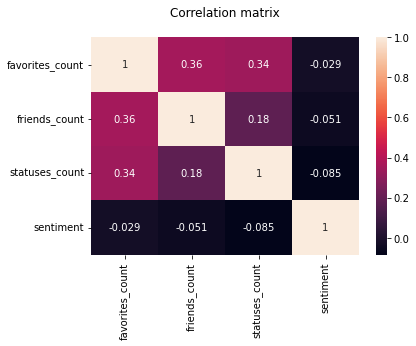

In [81]:
import seaborn as sns

import matplotlib.pyplot as plt

hm = sns.heatmap(df.corr(), annot = True)

hm.set(title = "Correlation matrix\n")

plt.show()

## Sentiment

In [33]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

import re
import pandas as pd
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [34]:
sentence = df['text_trans'][0]
sid.polarity_scores(sentence)['compound']

0.5574

In [35]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet)
         if w.lower() in words or not w.isalpha())
    return tweet
    

df['tweet_clean'] = df['text_trans'].apply(cleaner)

In [36]:
word_dict = {'manipulate':-1,'manipulative':-1,'jamescharlesiscancelled':-1,'jamescharlesisoverparty':-1,
            'pedophile':-1,'pedo':-1,'cancel':-1,'cancelled':-1,'cancel culture':0.4,'teamtati':-1,'teamjames':1,
            'teamjamescharles':1,'liar':-1}

import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
sid.lexicon.update(word_dict)

list1 = []
for i in df['tweet_clean']:
    list1.append((sid.polarity_scores(str(i)))['compound'])

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [37]:
df['sentiment'] = pd.Series(list1)

def sentiment_category(sentiment):
    label = ''
    if(sentiment>0):
        label = 'positive'
    elif(sentiment == 0):
        label = 'neutral'
    else:
        label = 'negative'
    return(label)

df['sentiment_category'] = df['sentiment'].apply(sentiment_category)

In [38]:
sent = df[['text_trans','sentiment','sentiment_category']]

In [39]:
sent.head(5)

,text_trans,sentiment,sentiment_category
0,enjoy playing hard get rpundysyzs,0.4215,positive
1,elonmusk first date teasing coming,-0.0772,negative
2,please populate mars lukewptxzy,0.3182,positive
3,elonmusk vn0rv0yq5q,0.0000,neutral
4,venus may life proud even hellish planet,-0.6369,negative


In [42]:
sent.describe()

,sentiment
count,42831.000000
mean,0.131312
std,0.347312
min,-0.965700
25%,0.000000
50%,0.000000
75%,0.401900
max,0.974100


In [43]:
sent.isnull().sum()

text_trans            0
sentiment             0
sentiment_category    0
dtype: int64

In [45]:
counter = 0
r,c = sent.shape

sent1 = sent.drop_duplicates()
sent1.reset_index(drop=True, inplace=True)

if sent1.shape==(r,c):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-sent1.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 335


               Sentiment Distribution              


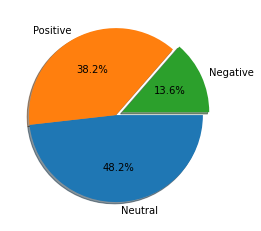

In [82]:
import matplotlib.pyplot as plt
print('\033[1mSentiment Distribution'.center(55))
plt.pie(sent['sentiment_category'].value_counts(), labels=['Neutral','Positive','Negative'], counterclock=False, shadow=True, 
        explode=[0,0,0.08], autopct='%1.1f%%', radius=1, startangle=0)
plt.show()